In [1]:
from osgeo import gdal
import numpy as np
import rasterio as rio
import matplotlib.pyplot as plt
from rasterio.plot import show
from pynhd import NLDI
from rasterio.mask import mask
from shapely import geometry
import geopandas as gpd
import json



# Read geotif using rasterio, and then subset using bounds of basin delineation pulled from NLDI using pynhd

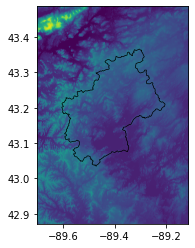

In [2]:

with rio.open(r'data\Mads_1.tif') as dataset:
    elev = dataset.read(1)

    basin = NLDI().getfeature_byid("comid", "13294318", basin=True).to_crs('epsg:4269')

    ax = plt.subplot(111)
    show(dataset, ax=ax)
    basin.plot(ax=ax, facecolor="none",
              edgecolor='black', lw=0.7)
    plt.show()



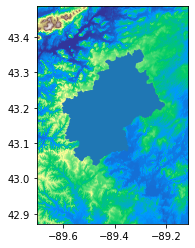

EPSG:4269 epsg:4269


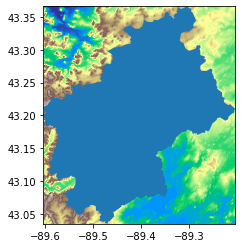

In [3]:
#Subset to bounding box of basin
ax = plt.subplot(111)
demdata = rio.open(r'data\Mads_1.tif')
show(demdata,cmap='terrain',ax=ax)
basin.plot(ax=ax)
plt.show()
print(demdata.crs, basin.crs)
# print(basin.boundary.to_json())
basin_coords = getFeatures(basin)
minx,miny,maxx,maxy = basin.total_bounds
p1 = geometry.Point(minx,miny)
p2 = geometry.Point(minx,maxy)
p3 = geometry.Point(maxx, maxy)
p4 = geometry.Point(maxx,miny)

pointlist = [p1,p2,p3,p4,p1]
clipBnd = geometry.Polygon(pointlist)
clip = gpd.GeoSeries(clipBnd)

out_img, out_transform = mask(dataset=demdata, shapes=clip, crop=True)
out_meta = demdata.meta
out_meta.update({"driver": "GTiff",
                 "height": out_img.shape[1],
                 "width": out_img.shape[2],
                 "transform": out_transform})
out_raster = rio.open(r'data\Mads_clip_2.tif', "w", **out_meta)
out_raster.write(out_img)

out_raster.close()

ax = plt.subplot(111)
demdata_clip = rio.open(r'data\Mads_clip_1.tif')
with rio.open(r'data\Mads_clip_1.tif') as dataset1:
    elev1 = dataset1.read(1)
show(demdata_clip,cmap='terrain',ax=ax)
basin.plot(ax=ax)
demdata_clip.close()

# Repeat with COG
COG built with gdal in conda env with following command: 
- gdal_translate "B:\ToolsTeam\COG\data\Mads_1.tif" "B:\ToolsTeam\COG\data\Mads_1_COG.tif" -co TILED=YES -co COPY_SRC_OVERVIEWS=YES -co COMPRESS=LZW

Test COG
- python "B:\ToolsTeam\COG\validate_cloud_optimized_geotiff.py" "B:\ToolsTeam\COG\data\Mads_1_COG.tif"


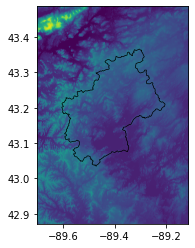

In [4]:
def getFeatures(gdf):
    """Function to parse features from GeoDataFrame in such a manner that rasterio wants them"""
    import json
    return [json.loads(gdf.to_json())['features'][0]['geometry']]

band_of_interest = 1 # DEM
with rio.open(r'data\Mads_1_COG.tif') as dataset:
    elev = dataset.read(1)

    basin = NLDI().getfeature_byid("comid", "13294318", basin=True).to_crs('epsg:4269')

    ax = plt.subplot(111)
    show(dataset, ax=ax)
    basin.plot(ax=ax, facecolor="none",
              edgecolor='black', lw=0.7)
    plt.show()


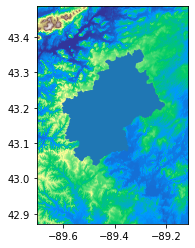

EPSG:4269 epsg:4269


<AxesSubplot:>

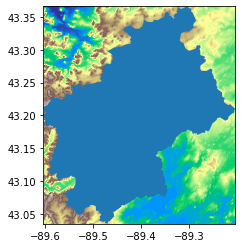

In [5]:
#Subset to bounding box of basin
ax = plt.subplot(111)
demdata = rio.open(r'data\Mads_1_COG.tif')
show(demdata,cmap='terrain',ax=ax)
basin.plot(ax=ax)
plt.show()
print(demdata.crs, basin.crs)
# print(basin.boundary.to_json())
basin_coords = getFeatures(basin)
minx,miny,maxx,maxy = basin.total_bounds
p1 = geometry.Point(minx,miny)
p2 = geometry.Point(minx,maxy)
p3 = geometry.Point(maxx, maxy)
p4 = geometry.Point(maxx,miny)

pointlist = [p1,p2,p3,p4,p1]
clipBnd = geometry.Polygon(pointlist)
clip = gpd.GeoSeries(clipBnd)

out_img, out_transform = mask(dataset=demdata, shapes=clip, crop=True)
out_meta = demdata.meta
out_meta.update({"driver": "GTiff",
                 "height": out_img.shape[1],
                 "width": out_img.shape[2],
                 "transform": out_transform})
out_raster = rio.open(r'data\Mads_1_clip_COG.tif', "w", **out_meta)
out_raster.write(out_img)

out_raster.close()

ax = plt.subplot(111)
demdata_clip = rio.open(r'data\Mads_1_clip_COG.tif')
with rio.open(r'data\Mads_clip_1.tif') as dataset1:
    elev1 = dataset1.read(1)
show(demdata_clip,cmap='terrain',ax=ax)
basin.plot(ax=ax)

# Read COG published in science base and loaded to S: 
- https://www.sciencebase.gov/catalog/item/5fcea8f0d34e30b9123974e0

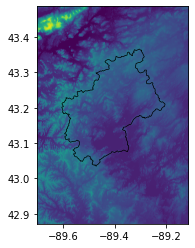

In [6]:
with rio.open('https://prod-is-usgs-sb-prod-publish.s3.amazonaws.com/5fcea8f0d34e30b9123974e0/Mads_1_COG.tif') as dataset:
    elev = dataset.read(1)

    basin = NLDI().getfeature_byid("comid", "13294318", basin=True).to_crs('epsg:4269')

    ax = plt.subplot(111)
    show(dataset, ax=ax)
    basin.plot(ax=ax, facecolor="none",
              edgecolor='black', lw=0.7)
    plt.show()


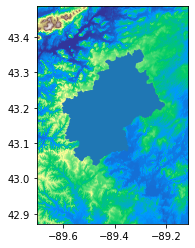

EPSG:4269 epsg:4269


<AxesSubplot:>

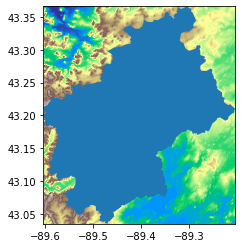

In [9]:
#Subset to bounding box of basin
ax = plt.subplot(111)
demdata = rio.open('https://prod-is-usgs-sb-prod-publish.s3.amazonaws.com/5fcea8f0d34e30b9123974e0/Mads_1_COG.tif')
show(demdata,cmap='terrain',ax=ax)
basin.plot(ax=ax)
plt.show()
print(demdata.crs, basin.crs)
# print(basin.boundary.to_json())
basin_coords = getFeatures(basin)
minx,miny,maxx,maxy = basin.total_bounds
p1 = geometry.Point(minx,miny)
p2 = geometry.Point(minx,maxy)
p3 = geometry.Point(maxx, maxy)
p4 = geometry.Point(maxx,miny)

pointlist = [p1,p2,p3,p4,p1]
clipBnd = geometry.Polygon(pointlist)
clip = gpd.GeoSeries(clipBnd)

out_img, out_transform = mask(dataset=demdata, shapes=clip, crop=True)
out_meta = demdata.meta
out_meta.update({"driver": "GTiff",
                 "height": out_img.shape[1],
                 "width": out_img.shape[2],
                 "transform": out_transform})
out_raster = rio.open(r'data\Mads_1_clip_COG_S3.tif', "w", **out_meta)
out_raster.write(out_img)

out_raster.close()

ax = plt.subplot(111)
demdata_clip = rio.open(r'data\Mads_1_clip_COG_S3.tif')
with rio.open(r'data\Mads_clip_1.tif') as dataset1:
    elev1 = dataset1.read(1)
show(demdata_clip,cmap='terrain',ax=ax)
basin.plot(ax=ax)

In [10]:
#print elev values just for a look
elev

array([[308.98187, 309.11514, 309.24722, ..., 301.65552, 301.6401 ,
        301.61786],
       [308.73938, 308.89117, 309.041  , ..., 301.47107, 301.44977,
        301.42807],
       [308.49677, 308.66626, 308.83862, ..., 301.29684, 301.2806 ,
        301.27063],
       ...,
       [338.07062, 337.8395 , 337.5291 , ..., 267.7491 , 267.95355,
        268.03162],
       [339.2527 , 339.00397, 338.7137 , ..., 267.44055, 267.56204,
        267.56918],
       [340.3461 , 340.0869 , 339.81424, ..., 267.0739 , 267.09293,
        267.05554]], dtype=float32)